In [6]:
import os
from pathlib import Path
! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json
cred_path = Path('~/.kaggle/kaggle.json').expanduser()

In [4]:
path = Path('rossmann-store-sales')

In [7]:
import zipfile,kaggle
kaggle.api.competition_download_cli(str(path))
zipfile.ZipFile(f'{path}.zip').extractall(path)

100%|██████████| 6.99M/6.99M [00:00<00:00, 81.9MB/s]

In [8]:
! ls {path}

sample_submission.csv  store.csv  test.csv  train.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_train = pd.read_csv(path/'train.csv')
df_store = pd.read_csv(path/'store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df_train.head(5).append(df_train.tail(5))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [12]:
round(df_train.describe(),0)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0
mean,558.0,4.0,5774.0,633.0,1.0,0.0,0.0
std,322.0,2.0,3850.0,464.0,0.0,0.0,0.0
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,280.0,2.0,3727.0,405.0,1.0,0.0,0.0
50%,558.0,4.0,5744.0,609.0,1.0,0.0,0.0
75%,838.0,6.0,7856.0,837.0,1.0,1.0,0.0
max,1115.0,7.0,41551.0,7388.0,1.0,1.0,1.0


In [13]:
df_store.head(5).append(df_store.tail(5))

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [14]:
df_store.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


Checking for missing values in df_store

In [15]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

imputing 0 inplace of numeric missing values

In [16]:
def fill_with_value(df,cols,val):
  for col in cols:
    df[col].fillna(val,inplace=True)
  return df

df_store = fill_with_value(df_store,['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear'],0)

In [17]:
df_store.PromoInterval.value_counts(dropna=False)

NaN                 544
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [19]:
df_store = fill_with_value(df_store,['PromoInterval'],'No_Promo')

If competitionDistance is Null: No competitor around:0
If competitionOpenSinceMonth or competitionOpenSinceYear is null,  

In [20]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [21]:
df_store.head(5).append(df_store.tail(5))

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No_Promo
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,No_Promo
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,No_Promo
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,No_Promo
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,No_Promo
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,No_Promo
1114,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [22]:
df_train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


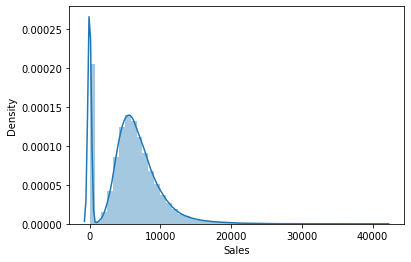

In [23]:
sns.distplot(df_train['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


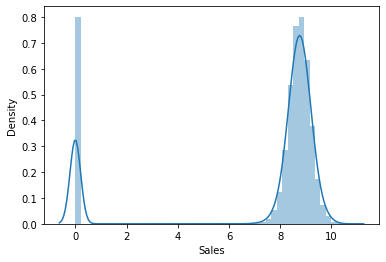

In [24]:
import numpy as np
sns.distplot(np.log(df_train['Sales']+1))

In [25]:
df_train['sales_log'] = np.log(df_train['Sales']+1)
#df_train['inv_log'] = np.exp(df_train['sales_log'])-1
df_train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,sales_log
0,1,5,2015-07-31,5263,555,1,1,0,1,8.568646
1,2,5,2015-07-31,6064,625,1,1,0,1,8.710290
2,3,5,2015-07-31,8314,821,1,1,0,1,9.025816
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.546527
4,5,5,2015-07-31,4822,559,1,1,0,1,8.481151


In [26]:
df_test = pd.read_csv(path/'test.csv')
df_test.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [55]:
df_test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [56]:
df_test[pd.isna(df_test['Open'])]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [27]:
df_test.fillna(1,inplace=True)

In [28]:
def store_merge(df):
  return df.merge(df_store,on='Store')

In [102]:
import datetime

df_train_st = store_merge(df_train)
df_train_st.head()

def data_pre_processing(df,is_test='N'):
  mapping = {'0':0,'a':1,'b':2,'c':3,'d':4}
  df['StateHoliday'] = df['StateHoliday'].replace(mapping)
  df['StoreType'] = df['StoreType'].replace(mapping)
  df['Assortment'] = df['Assortment'].replace(mapping)
  df['Date'] = pd.to_datetime(df['Date'])
  df['sales_month'] = df['Date'].dt.month
  df['sales_year'] = df['Date'].dt.year
  df['sales_month_day'] = df['Date'].dt.day
  df['sales_calendar_week'] = df['Date'].dt.weekofyear

  # calculate competiter open time in months
  df['CompetitionOpen'] = (12 * (df.sales_year - df.CompetitionOpenSinceYear)) + (df.sales_month - df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)
  df['CompetitionOpen'] = np.where(df['CompetitionOpenSinceYear']==0,0,df['CompetitionOpen'])
  
  # calculate promo2 open time in months
  df['PromoOpen'] = (12 * (df.sales_year - df.Promo2SinceYear)) + (df.sales_calendar_week - df.Promo2SinceWeek) / 4.0
  df['PromoOpen'] = df['PromoOpen'].apply(lambda x: x if x > 0 else 0)
  df['PromoOpen'] = np.where(df['Promo2SinceYear']==0,0,df['PromoOpen'])

  mapping2 = {'No_Promo':0,'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}

  df['PromoInterval'] = df['PromoInterval'].replace(mapping2)

  df.drop(['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2SinceYear','Promo2SinceWeek','Date'],axis=1,inplace=True)

  if is_test=='N':
    df.drop(['Customers','Sales'],axis=1,inplace=True)
  else:
    df.drop(['Id'],axis=1,inplace=True)
  

  return df

In [88]:
df_train_st_prp = data_pre_processing(df_train_st)
print(df_train_st_prp.shape)
df_train_st_prp.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


(1017209, 18)


,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,sales_log,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,sales_month,sales_year,sales_month_day,sales_calendar_week,CompetitionOpen,PromoOpen
0,1,5,1,1,0,1,8.568646,3,1,1270.0,0,0,7,2015,31,31,82.0,0.0
1,1,4,1,1,0,1,8.521384,3,1,1270.0,0,0,7,2015,30,31,82.0,0.0
2,1,3,1,1,0,1,8.472823,3,1,1270.0,0,0,7,2015,29,31,82.0,0.0
3,1,2,1,1,0,1,8.519590,3,1,1270.0,0,0,7,2015,28,31,82.0,0.0
4,1,1,1,1,0,1,8.716536,3,1,1270.0,0,0,7,2015,27,31,82.0,0.0


In [89]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_train_st_prp,test_size=0.2,random_state=42)
print(train_data.shape)
print(test_data.shape)

(813767, 18)
(203442, 18)


In [90]:
train_data_y =  train_data['sales_log']
train_data_x = train_data.drop('sales_log',axis=1)

test_data_y =  test_data['sales_log']
test_data_x = test_data.drop('sales_log',axis=1)

print(train_data_x.shape)
print(train_data_y.shape)
print(test_data_x.shape)
print(test_data_y.shape)

(813767, 17)
(813767,)
(203442, 17)
(203442,)


In [92]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=100)
forest_regressor.fit(train_data_x,train_data_y)

RandomForestRegressor()

In [98]:
from sklearn.metrics import mean_squared_error
prediction = forest_regressor.predict(test_data_x)

13.362359083539962

In [99]:
pred_exp = (np.exp(prediction)-1)
act_exp = (np.exp(test_data_y)-1)
#mse = mean_squared_error(np.exp(test_data_y)-1, np.exp(prediction)-1)
rmpse = np.sqrt(np.mean(np.square(np.where(act_exp==0,0,((act_exp- pred_exp) / (act_exp))))))
rmpse

0.13362359083539962

In [108]:
df_test_st = store_merge(df_test)
index_id = df_test_st[['Id']]
index_id

,Id
0,1
1,857
2,1713
3,2569
4,3425
...,...
41083,37664
41084,38520
41085,39376
41086,40232


In [109]:
df_test_st_prp = data_pre_processing(df_test_st,'Y')
print(df_test_st_prp.shape)
df_test_st_prp.head(5)

(41088, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,sales_month,sales_year,sales_month_day,sales_calendar_week,CompetitionOpen,PromoOpen
0,1,4,1.0,1,0,0,3,1,1270.0,0,0,9,2015,17,38,84.0,0.0
1,1,3,1.0,1,0,0,3,1,1270.0,0,0,9,2015,16,38,84.0,0.0
2,1,2,1.0,1,0,0,3,1,1270.0,0,0,9,2015,15,38,84.0,0.0
3,1,1,1.0,1,0,0,3,1,1270.0,0,0,9,2015,14,38,84.0,0.0
4,1,7,0.0,0,0,0,3,1,1270.0,0,0,9,2015,13,37,84.0,0.0


In [110]:
prediction = forest_regressor.predict(df_test_st_prp)

In [118]:
output = pd.concat([index_id,pd.DataFrame(np.exp(prediction)-1,columns=['Sales'])],axis=1)
output.to_csv("submission.csv")